In [126]:
import os
import string
import pandas as pd
import re
path = './financial-news-dataset-master/ReutersNews106521/20061020/businesspro-energy-exxonmobil-alaska-dc-idUSN2021166720061020'

In [127]:
pwf = open(path, 'r')

In [128]:
pwf

<_io.TextIOWrapper name='./financial-news-dataset-master/ReutersNews106521/20061020/businesspro-energy-exxonmobil-alaska-dc-idUSN2021166720061020' mode='r' encoding='cp936'>

In [129]:
lines=pwf.readlines()

In [140]:
for i in range(len(lines)):
    if len(lines[i])>3 and (lines[i][len(lines[i])-3]=='.' or lines[i][len(lines[i])-2]=='.'):
        print(lines[i])

to a letter made public on Friday. 

that would ship North Slope natural gas to the lower 48 U.S. 



In [138]:
lines[4]

'\n'

In [7]:
import re
from nltk.corpus import stopwords
import os
import pandas as pd
def clean_text(text, remove_stopwords = True):
    text = text.lower()
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r"\d", "", text)
    text = re.sub(r'[_"\'\-;%()|.,$+&=*%.,!?:#@\[\]\\\/]', '', text)
    text = re.sub(r"reuters", "", text)
    text = re.sub(r"washington", "", text)
    text = re.sub(r"new york", "", text)
    text = re.sub(r"seattle", "", text)
    text = re.sub(r"los angeles", "", text)
    text = re.sub(r"francisco", "", text)
    text = re.sub(r"francisconew ", "", text)
    text = re.sub(r"us", "", text)
    text = re.sub(r"wall street", "", text)
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
}


path = './financial-news-dataset-master/ReutersNews106521'
df = pd.DataFrame(columns=['Short Headline', 'Day','Month','Year','Headlines', 'Report'])
files = os.listdir(path)
num=0

for k in files:
    relPath = path + '/' + k
    if(relPath.find('.DS') > -1):
        continue
    file = os.listdir(relPath)
    for f in file:
        print("Processing "+ str(num)+'/'+"106493",end="\r")
        if(f.find('.tar') > -1 or f.find('.DS') > -1):
            continue
        pwf = open(relPath + '/' +f, 'r')
        lines = pwf.readlines()
        if len(lines)==0:
            continue
        shortheadline=' '.join(lines[0][3:].split())
        Month=re.search(r'.* (.*) (.*), (\d+) .*',lines[2][3:]).group(1)
        Day=re.search(r'.* (.*) (.*), (\d+) .*',lines[2][3:]).group(2)
        Year=re.search(r'.* (.*) (.*), (\d+) .*',lines[2][3:]).group(3)
        i=4
        while i<len(lines) and len(lines[i].split())==0:
            i+=1
        headlines=''
        while i<len(lines) and len(lines[i].split())!=0:
            headlines=headlines+' '+' '.join(lines[i].split())
            if lines[i][len(lines[i])-3]=='.' or lines[i][len(lines[i])-2]=='.':
                i+=1
                break
            i+=1
        while i<len(lines) and len(lines[i].split())==0:
            i+=1
        report=''
        while i<len(lines) and len(lines[i].split())!=0 :
            report=report+' '+' '.join(lines[i].split())
            i+=1
        dfi={'Short Headline':[clean_text(shortheadline)], 'Day':[Day],'Month':[Month],'Year':[Year], 'Headlines':[clean_text(headlines)], 'Report':[clean_text(report)]}
        dfc=pd.DataFrame(dfi)
        lis = [df, dfc]
        df = pd.concat(lis, ignore_index = True)
        pwf.close()
        num+=1

df.to_csv('news_update.csv', sep=',', encoding='utf-8')

In [23]:
news=pd.read_csv("news_update.csv",keep_default_na=False)
num=0
for i in range(len(news)):
    if len(str(news['Headlines'][i]).split())==0:
        num+=1

In [25]:
news

Unnamed: 0                                     Short Headline  Day  \
0                0         exxon mobil offers plan end alaska dispute   20   
1                1                       hey buddy spare google share   20   
2                2  exhedge fund exec wins sec leniency helping th...   12   
3                3      aol ceo says sales may shrink two years paper   21   
4                4            fed keep hawkish tone hold rates steady   22   
...            ...                                                ...  ...   
106488      106488   jpmorgan agrees billion settlement bad mortgages   19   
106489      106489          dow sp retreat second day best buy weighs   19   
106490      106490  bernanke looking forward writing speaking post...   19   
106491      106491     bernanke fed committed easy policy long needed   19   
106492      106492  analysis retailers brace margin hit holiday di...   19   

       Month  Year                                          Headlines  \
0        Oct  2006  anchorage alaska exxon mobil xomn offered pay ...   
1        Oct  2006  san analysts raced outdo one another friday ra...   
2        Nov  2013  former hedge fund administrator reached agreem...   
3        Oct  2006  frankfurt internet service provider aol sales ...   
4        Oct  2006  central bank expected hold interest rates stea...   
...      ...   ...                                                ...   
106488   Nov  2013  late september jpmorgan chief executive jamie ...   
106489   Nov  2013  stocks fell tuesday dow sp retreating mileston...   
106490   Nov  2013  federal reserve chairman ben bernanke first pu...   
106491   Nov  2013  federal reserve chairman ben bernanke said tue...   
106492   Nov  2013  shoppers like stayathome mom san sterling amer...   

                                                   Report  
0       proposal sent earlier week alaska department n...  
1       brokers responding quarterly results thursday ...  
2       sec tuesday said entered deferred prosecution ...  
3       maybe another two years right jonathan miller ...  
4       federal reserve probably make minor changes st...  
...                                                   ...  
106488  willing take lumps said according person brief...  
106489  trading remained tight range federal reserve c...  
106490  became policymaker academic worked lot issues ...  
106491  speech national economists club echoed dovish ...  
106492  yearold mountain home idaho expects spend holi...  

[106493 rows x 7 columns]

In [27]:
sp500=pd.read_csv("sp500.csv")

In [321]:
input_shape

(18193,)

In [87]:
sp500.to_csv('sp500_headline.csv', sep=',', encoding='utf-8')

In [25]:
import os
import string
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Add
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
changes=(change-np.mean(change))/np.std(change)
X_train, X_test, y_train, y_test = train_test_split(company_headlines, changes, test_size=0.1)
tfidf = TfidfVectorizer(min_df=0) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(X_train)
input_shape = x_train_tfidf.shape[1:]
model = Sequential()
model.add(Dropout(rate=0.2, input_shape=input_shape))
model.add(Dense(units=128))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')

accuracy_=[]
class MyCustomCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs=None):
            
            predictions = model.predict(tfidf.transform(X_test), verbose = 0)
            num=0
            
            #y_test_=y_test*(max(change)-min(change))+min(change)
            #predictions=predictions*(max(change)-min(change))+min(change)
            for i in range(len(y_test)):
                if y_test[i]*predictions[i]>0:
                    num+=1
            print('Testing accuracy is: '+str(num/len(y_test)))
            accuracy_.append(num/len(y_test))
            
            
history = model.fit(x_train_tfidf, y_train, epochs=100, validation_data=(tfidf.transform(X_test), y_test), verbose=1, batch_size=64,callbacks=[MyCustomCallback()])

Train on 11962 samples, validate on 1330 samples
Epoch 1/100
11962/11962 [==============================] - 3s 233us/step - loss: 1.0245 - val_loss: 0.7512
Testing accuracy is: 0.5293233082706766
Epoch 2/100
11962/11962 [==============================] - 3s 217us/step - loss: 1.0006 - val_loss: 0.7467
Testing accuracy is: 0.5413533834586466
Epoch 3/100
11962/11962 [==============================] - 3s 218us/step - loss: 0.9720 - val_loss: 0.7416
Testing accuracy is: 0.5413533834586466
Epoch 4/100
11962/11962 [==============================] - 3s 218us/step - loss: 0.9389 - val_loss: 0.7370
Testing accuracy is: 0.5406015037593985
Epoch 5/100
11962/11962 [==============================] - 3s 219us/step - loss: 0.9001 - val_loss: 0.7351
Testing accuracy is: 0.5496240601503759
Epoch 6/100
11962/11962 [==============================] - 3s 217us/step - loss: 0.8586 - val_loss: 0.7347
Testing accuracy is: 0.5586466165413534
Epoch 7/100
11962/11962 [==============================] - 3s 217us/s

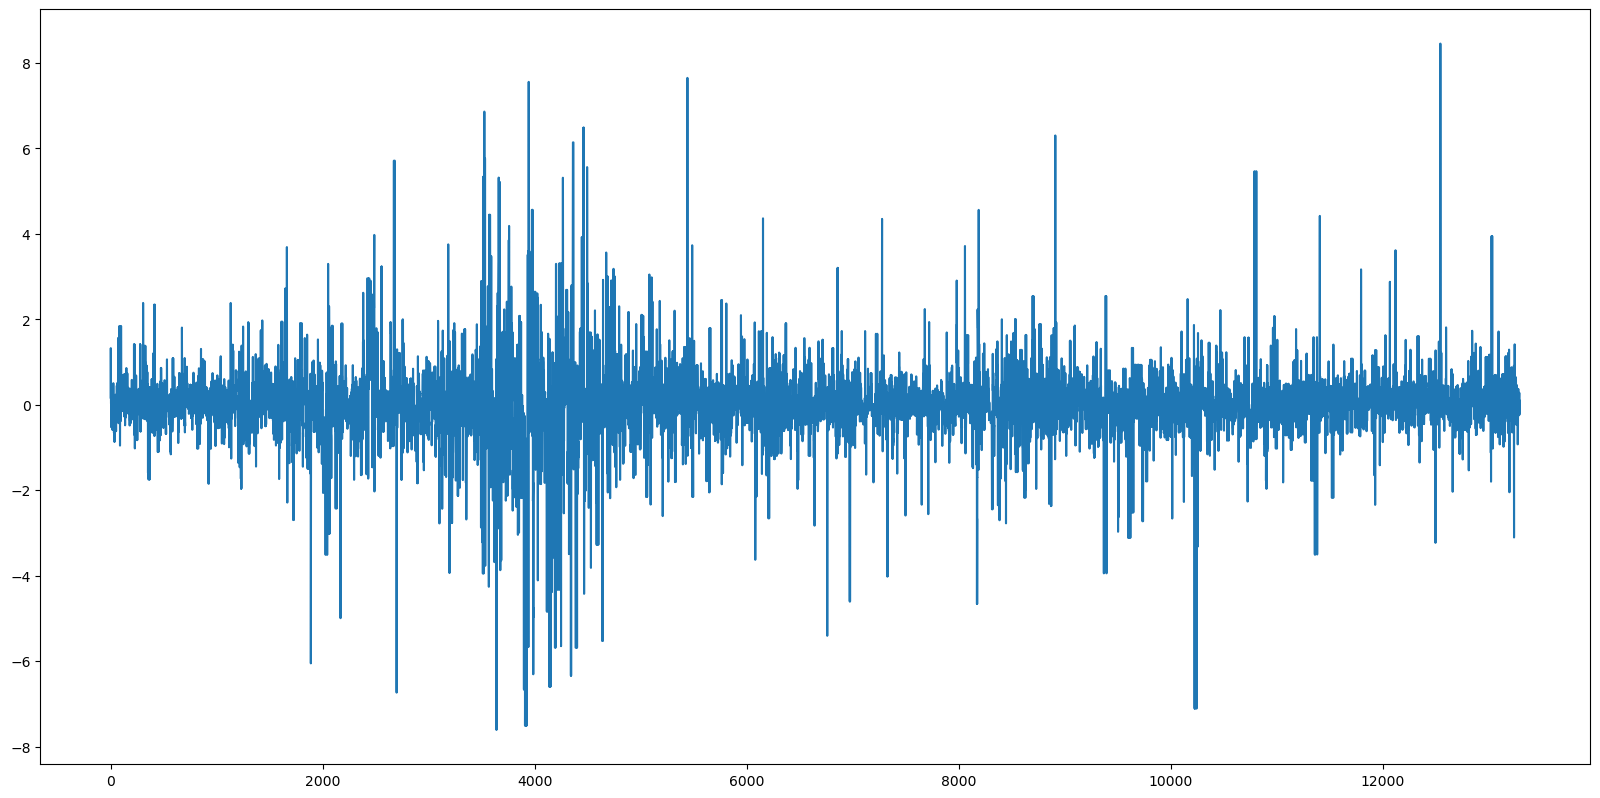

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=100) 
plt.plot(changes)

In [29]:
with open("company_headlines.txt", "rb") as fp:   # Unpickling
     company_headlines = pickle.load(fp)

with open("company_headlines_change.txt", "rb") as f:   # Unpickling
     change = pickle.load(f)
length=len(change)
for i in range(length):
    k=length-i-1
    if abs(change[k])>=0.3:
        change.pop(k)
        company_headlines.pop(k)


In [32]:
with open("company_headlines.txt", "rb") as fp:   # Unpickling
     company_headlines = pickle.load(fp)

with open("company_headlines_change.txt", "rb") as f:   # Unpickling
     change = pickle.load(f)

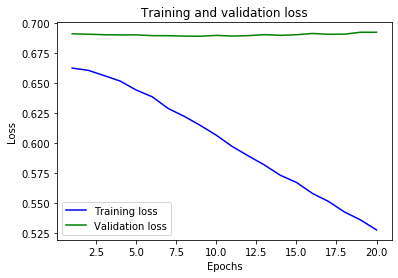

In [114]:
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epochs = range(1,len(loss) + 1)
    
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('com_loss.png')
plt.legend()
plt.show()

In [115]:
predictions = model.predict(tfidf.transform(X_test), verbose = True)

357/357 [==============================] - 0s 641us/step


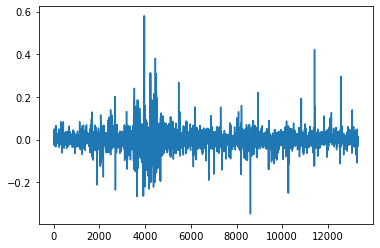

In [54]:
plt.plot(change)

company_list

In [318]:
len(company)

105

In [246]:
import pandas as pd
import numpy as np
import re


def clean_word(text, remove_stopwords = True):
    text = text.lower()
    # Format words and remove unwanted characters
    #word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles',
     #     'apple','amazon','google',
      #    'intel','mcdonald','microsoft','twitter','walmart']
    word=[' us ',' reuters ',' york ',' street ',' wall ',' san ',' francisco ',' francisconew ',' seattle ',' los ',' chicago ',' angeles ',
         'chicago ','chicago']
    for i in word:
        text = re.sub(i, "", text)
    return text

def combine_companyname(text, remove_stopwords = True):

    text = re.sub('american airlines',"americanairlines", text)
    text = re.sub('american express',"americanexpress", text)
    text = re.sub('american tower',"americantower", text)
    text = re.sub('citi group',"citigroup", text)
    text = re.sub('coca cola',"cocacola", text)
    text = re.sub('morgan stanley',"morganstanley", text)
    text = re.sub('southwest airlines',"southwestairlines", text)
    text = re.sub('texas instruments',"texasinstruments", text)
    text = re.sub('wells fargo',"wellsfargo", text)
    text = re.sub('berkshire hathaway',"berkshirehathaway", text)
    text = re.sub('general motors',"generalmotors", text)
    text = re.sub('general electric',"generalelectric", text)
    text = re.sub('fannie mae',"fanniemae", text)
    text = re.sub('bank of america',"bankofamerica", text)
    text = re.sub('united technologies',"unitedtechnologies", text)
    return text

news=pd.read_csv("news_update.csv",keep_default_na=False)
sp500=pd.read_csv("sp500.csv")
sp500_all=pd.read_csv("sp500_all.csv")
report=[]
index=[]
for i in range(len(news)):
    report.append(combine_companyname(news['Headlines'][i]))
company_headlines=[]
change=[]
company_list={}
sp500_headlines=[]
#company=['apple']
company=['apple','amazon','google','intel','mcdonald','microsoft','twitter','walmart',
     '3m','abbott','abbvie','abiomed','accenture','adobe','aes','amd','aflac',
     'akamai','albemarle','align','allegion','alphabet','altria','americanairlines',
     'americanexpress','americantower','ameriprise','amerisourcebergan','ametek','amgen','amphenol',
     'ansys','anthem','aosmith','apache','assurant','att','atmos','autodesk',
     'autozone','boigen','blackrock','boeing','borgwarner','chubb','cisco','citigroup','cme',
     'cms','cocacola','comerica','corning','cvs','darden','davita','deere','deltaair',
     'diamondback','dominion','ebay','ecolab','edison','edwards','facebook','fiserv',
     'hp','idex','idexx','illumina','ibm','jpmorgan','lilly','mckesson','moody',
     'morganstanley','netflix','nike','ross','southwestairlines','texasinstruments',
     'visa','wellsfargo','welltower','xerox','xilinx','zebra','zoetis','exxon',
     'unitedhealth','chevron','generalmotors','costco','cardinal','verizon','kroger','generalelectric','fanniemae',
      'bankofamerica','dupont','johnson','unitedtechnologies','metlife','fedex','pepsico','goldman']

code={'apple':'AAPL','amazon':'AMZN','google':'GOOGL','intel':'INTC','mcdonald':'MCD','microsoft':'MSFT','twitter':'TWTR','walmart':'WMT',
     '3m':'MMM','abbott':'ABT','abbvie':'ABBV','abiomed':'ABMD','accenture':'ACN','adobe':'ADBE','aes':'AES','amd':'AMD','aflac':'AFL',
     'akamai':'AKAM','albemarle':'ALB','align':'ALGN','allegion':'ALLE','alphabet':'GOOGL','altria':'MO','americanairlines':'AAL',
     'americanexpress':'AXP','americantower':'AMT','ameriprise':'AMP','amerisourcebergan':'ABC','ametek':'AME','amgen':'AMGN','amphenol':'APH',
     'ansys':'ANSS','anthem':'ANTM','aosmith':'AOS','apache':'APA','arista':'ANET','assurant':'AIZ','att':'T','atmos':'ATO','autodesk':'ADSK',
     'autozone':'AZO','boigen':'BIIB','blackrock':'BLK','boeing':'BA','borgwarner':'BXP','chubb':'CB','cisco':'CSCO','citigroup':'C','cme':'CME',
     'cms':'CMS','cocacola':'KO','comerica':'CMA','corning':'GLW','cvs':'CVS','darden':'DRI','davita':'DVA','deere':'DE','deltaair':'DAL',
     'diamondback':'FANG','dominion':'D','dow':'DOW','ebay':'EBAY','ecolab':'ECL','edison':'EIX','edwards':'EW','facebook':'FB','fiserv':'FISV',
     'fox':'FOX','hp':'HP','idex':'IEX','idexx':'IDXX','illumina':'ILMN','ibm':'IBM','jpmorgan':'JPM','lilly':'LLY','mckesson':'MCK','moody':'MCO',
     'morganstanley':'MS','netflix':'NFLX','nike':'NKE','paypal':'PYPL','ross':'ROST','southwestairlines':'LUV','texasinstruments':'TXN',
     'visa':'V','wellsfargo':'WFC','welltower':'WELL','xerox':'XRX','xilinx':'XLNX','zebra':'ZBRA','zoetis':'ZTS','exxon':'XOM',
     'unitedhealth':'UNH','chevron':'CVX','generalmotors':'GM','costco':'COST','cardinal':'CAH','verizon':'VZ','kroger':'KR',
      'generalelectric':'GE','fanniemae':'FNMA','dupont':'DD','goldman':'GS','bankofamerica':'BAC','dell':'DELL','johnson':'JNJ',
      'unitedtechnologies':'RTX','metlife':'MET','fedex':'FDX','pepsico':'PEP'}

for i in range(len(report)):
    print(str(i)+'/'+str(len(report))+'         There is '+str(len(change))+' data',end="\r")
    for data in company:
        if data in news['Headlines'][i].split():
            date_=str(news['Day'][i])+'-'+str(news['Month'][i])+'-'+str(news['Year'][i])[2:4]
            if date_!='20-Nov-13' and date_!='20-Oct-06':
                code_=code[data]+'.Close'
                for k in range(1,len(sp500)):
                    if date_==sp500['Date'][k]:
                        change_=(sp500_all[code_][k-1]-sp500_all[code_][k-2])/sp500_all[code_][k-2]
                        if np.isnan(change_)==False and len(report[i].split())!=0:
                            change.append(change_)
                            company_headlines.append(clean_word(report[i]))
                            index.append(news['Headlines'][i])
                            if data in company_list:
                                company_list[data]+=1
                            else:
                                company_list[data]=1
                        break
            break

In [17]:
import pickle
with open("company_headlines.txt", "wb") as fp:   #Pickling
      pickle.dump(company_headlines, fp)
with open("company_headlines_change.txt", "wb") as fp:   #Pickling
      pickle.dump(change, fp)

In [4]:
word_counts = {}

for data in report:
    for word in data.split():
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 47972


In [97]:
company_list.keys()

dict_keys(['exxon', 'google', 'walmart', 'att', 'goldman', 'dupont', 'pepsico', 'microsoft', 'johnson', 'altria', 'boeing', 'cocacola', 'borgwarner', 'chevron', 'intel', 'metlife', 'verizon', 'ibm', 'cvs', 'apple', 'costco', 'citigroup', 'fedex', 'edison', 'abbott', 'mcdonald', 'ebay', 'cisco', 'align', 'ameriprise', 'illumina', 'nike', 'cme', 'ross', 'xerox', 'deere', 'cardinal', 'unitedhealth', 'autozone', 'netflix', 'kroger', 'lilly', 'adobe', 'chubb', 'edwards', 'apache', 'cms', 'jpmorgan', 'blackrock', 'corning', 'dominion', 'hp', 'amgen', 'accenture', 'moody', 'darden', 'aflac', 'davita', 'fiserv', 'mckesson', 'amd', 'amazon', 'visa', 'akamai', 'albemarle', 'comerica', 'autodesk', 'aes', 'facebook', 'xilinx', 'diamondback', 'zoetis', 'abbvie', 'twitter'])

In [108]:
import operator

import matplotlib.pyplot as plt
import matplotlib
import csv
my_dict=dict(sorted(company_list.items(), key=operator.itemgetter(1),reverse=True))
with open('company.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))



In [ ]:
word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles','sachs','inc',
      'said','billion','bank','thursday','wednesday','monday','friday','co','year']

In [25]:
import pandas as pd
import numpy as np
import re


date_company=[]
news=pd.read_csv("news.csv",keep_default_na=False)
sp500=pd.read_csv("sp500.csv")
sp500_all=pd.read_csv("sp500_all.csv")
report=news['Headlines']+news['Report']
company_report=[]
change=[]
company=['apple']
code={'apple':'AAPL','amazon':'AMZN','google':'GOOGL','intel':'INTC','mcdonald':'MCD','microsoft':'MSFT','twitter':'TWTR','walmart':'WMT'}
index=[]
index_sp500=[]
for i in range(len(report)):
    print(str(i)+'/'+str(len(report)),end="\r")
    for data in company:
        if data in news['Short Headline'][i].split():
            date_=str(news['Day'][i])+'-'+str(news['Month'][i])+'-'+str(news['Year'][i])[2:4]
            if date_!='20-Nov-13':
                code_=code[data]+'.Close'
                for k in range(1,len(sp500)):
                    if date_==sp500['Date'][k]:
                        change_=(sp500_all[code_][k]-sp500_all[code_][k-1])/sp500_all[code_][k-1]
                        if np.isnan(change_)==False:
                            index_sp500.append(k-1)
                            date_company.append(date_)
                            change.append(change_)
                            company_report.append(report[i])
                            index.append(i)
            break

1874/106493

In [320]:
len(company_list)

74

In [37]:
date_=[]
for date in index_sp500:
    if date not in date_:
        date_.append(date)

31993    new york reuters shares apple slid percent ext...
Name: Headlines, dtype: object
-0.012592864600281287


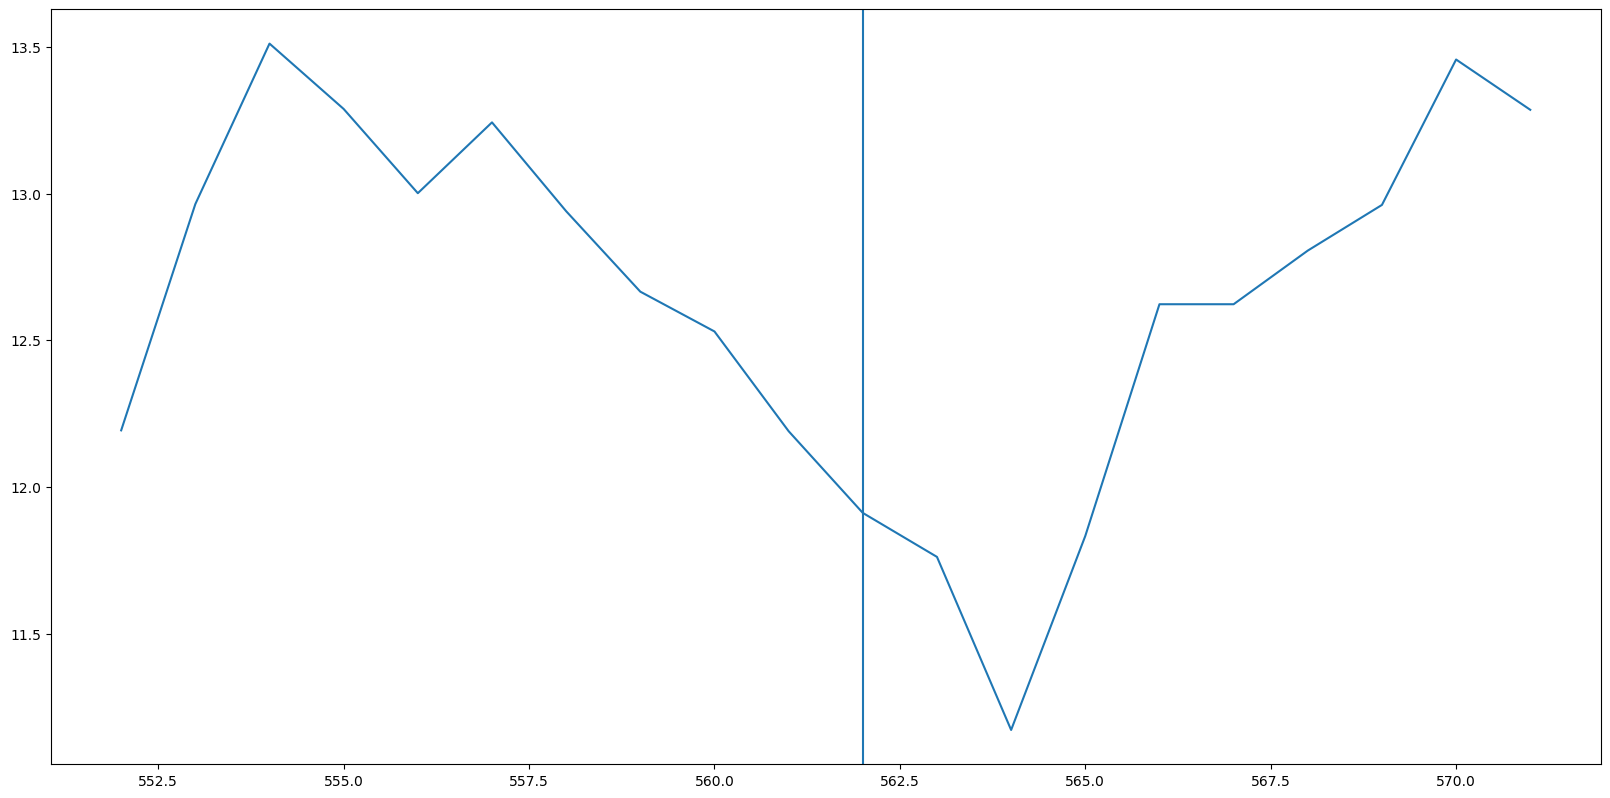

In [113]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
#for xc in date_[50]:
k=217
plt.axvline(x=index_sp500[k])
x=index_sp500[k]-10
y=index_sp500[k]+10
plt.plot(sp500_all['AAPL.Close'][x:y])
print(news['Headlines'][index][k:k+1])
print(str(change[k]))


In [119]:
news['Headlines'][1256]

'new york reuters wireless technology firm qualcomm inc qcomo said monday buying two microchip businesses boost core wireless technology product offerings'

In [123]:
num=0
for i in range(len(news)):
    if len(str(news['Report'][i]).split())==0:
        num+=1

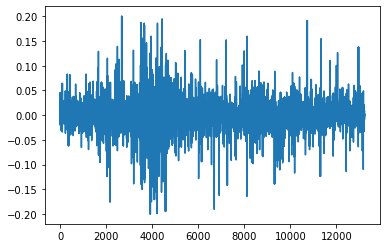

In [56]:
plt.plot(change)

In [183]:
#with open("company_headlines.txt", "rb") as fp:   # Unpickling
#     company_headlines = pickle.load(fp)

#with open("company_headlines_change.txt", "rb") as f:   # Unpickling
#     change = pickle.load(f)

length=len(change)
for i in range(length):
    k=length-i-1
    if abs(change[k])>=0.2:
        change.pop(k)
        company_headlines.pop(k)


In [33]:
embeddings_index = {}
with open('glove.840B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 2196016


{',': array([-0.082752 ,  0.67204  , -0.14987  , -0.064983 ,  0.056491 ,
         0.40228  ,  0.0027747, -0.3311   , -0.30691  ,  2.0817   ,
         0.031819 ,  0.013643 ,  0.30265  ,  0.0071297, -0.5819   ,
        -0.2774   , -0.062254 ,  1.1451   , -0.24232  ,  0.1235   ,
        -0.12243  ,  0.33152  , -0.006162 , -0.30541  , -0.13057  ,
        -0.054601 ,  0.037083 , -0.070552 ,  0.5893   , -0.30385  ,
         0.2898   , -0.14653  , -0.27052  ,  0.37161  ,  0.32031  ,
        -0.29125  ,  0.0052483, -0.13212  , -0.052736 ,  0.087349 ,
        -0.26668  , -0.16897  ,  0.015162 , -0.0083746, -0.14871  ,
         0.23413  , -0.20719  , -0.091386 ,  0.40075  , -0.17223  ,
         0.18145  ,  0.37586  , -0.28682  ,  0.37289  , -0.16185  ,
         0.18008  ,  0.3032   , -0.13216  ,  0.18352  ,  0.095759 ,
         0.094916 ,  0.008289 ,  0.11761  ,  0.34046  ,  0.03677  ,
        -0.29077  ,  0.058303 , -0.027814 ,  0.082941 ,  0.1862   ,
        -0.031494 ,  0.27985  , -0.074412 ,

In [224]:
word_counts = {}

for data in test:
    for word in data.split():
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 164


In [12]:
test=['citigroup shares lost s',

'citigroup ',

'goldman sachs group inc gsn interested buying hardhit citigroup inc cn even substantial government financial support person familiar goldman strategy said friday ',

'citigroup inc chief executive vikram pandit tried downplay speculation banking giant might sell major binesses restore health investor confidence shares still tumbled fifth straight day ',

'chicago mets citigroup inc said friday naming rights deal struggling banking giant baseball team new ballpark remains place ',

'citigroup inc share price sinks investors wondering government help bank open question four investors spoke proposed scenarios ladenburg thalmann dick bove said see reason citigroup fail maintained buy rating stock ',

'citigroup inc shares plunged anew friday breaking key level share reversing early gains news bank mulling variety options restore bank health commercial real estate becoming bigger issue banks treasury decided funds troubled asset relief program ed buy troubled assets ',

'citigroup said chicago option trading volume citigroup inc swelled thursday many speculators bet bank hardhit stock would extend losses friday november options expiration citigroup inc planning selling stake turkish lender akbank source familiar situation said friday ',

'citigroup inc talking recent days treasury department federal reserve options share price sinks person familiar matter said citigroup inc begun talks government plummeting share price raises doubts bank ability survive person familiar matter said ',

'chicago mets citigroup inc said friday naming rights deal struggling banking giant baseball team new ballpark remains place ',

'citigroup inc shares plunged anew friday breaking key level share reversing early gains news bank mulling variety options restore bank health faces stiff headwinds week ahead fate ',

'citigroup largest among stand way building friday big rally preventing november winding one worst months stocks record ',

'commercial real estate becoming bigger issue banks treasury decided funds troubled asset relief program ed buy troubled assets citigroup said ',
]

0.25

In [185]:
missing_words = 0
threshold = 5

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),4)*100
            
print("Number of words missing from GloVe:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))

Number of words missing from GloVe: 0
Percent of words that are missing from vocabulary: 0.0%


In [186]:
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>"] 

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total Number of Unique Words:", len(word_counts))
print("Number of Words we will use:", len(vocab_to_int))
print("Percent of Words we will use: {}%".format(usage_ratio))

Total Number of Unique Words: 18798
Number of Words we will use: 16073
Percent of Words we will use: 85.5%


In [187]:
embedding_dim = 300

nb_words = len(vocab_to_int)
# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in GloVe, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

In [32]:
import pickle
with open("word_embedding_matrix_thres_5_previousday_test.txt", "wb") as fp:   #Pickling
      pickle.dump(word_embedding_matrix, fp)

In [189]:
word_count = 0
unk_count = 0

int_company_report = []
company_report=company_headlines
for i in range(len(company_report)):
    data=company_report[i]
    int_daily_headlines = []
    for word in data.split():
        word_count += 1
        if word in vocab_to_int:
            int_daily_headlines.append(vocab_to_int[word])
        else:
            int_daily_headlines.append(vocab_to_int["<UNK>"])
            unk_count += 1
    int_company_report.append(int_daily_headlines)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 341373
Total number of UNKs in headlines: 3994
Percent of words that are UNK: 1.17%


In [190]:
length=0
for i in range(len(int_company_report)):
    length+=len(int_company_report[i])
length/=len(int_company_report)
length

25.90279990894605

In [191]:
max_headline_length = 16
max_daily_length = 30
pad_company_report = []

for i in range(len(int_company_report)):
    data=int_company_report[i]
    # Pad daily_headlines if they are less than max length
    if len(data) < max_daily_length:
        for i in range(max_daily_length-len(data)):
            pad = vocab_to_int["<PAD>"]
            data.append(pad)
    # Limit daily_headlines if they are more than max length
    else:
        data = data[:max_daily_length]
    pad_company_report.append(data)



In [31]:
with open("pad_company_report_thre_5_max_30_previousday_test.txt", "wb") as fp:   #Pickling
      pickle.dump(pad_company_report, fp)

In [193]:
changes=(change-np.mean(change))/np.std(change)

In [74]:
np.quantile(change,1/3)

-0.6666666666667425

In [75]:
np.quantile(change,2/3)

0.6666666666665151

In [31]:
0.5*np.std(change)+np.mean(change)

0.021267748205424562

In [27]:
changes=(change-np.mean(change))/np.std(change)

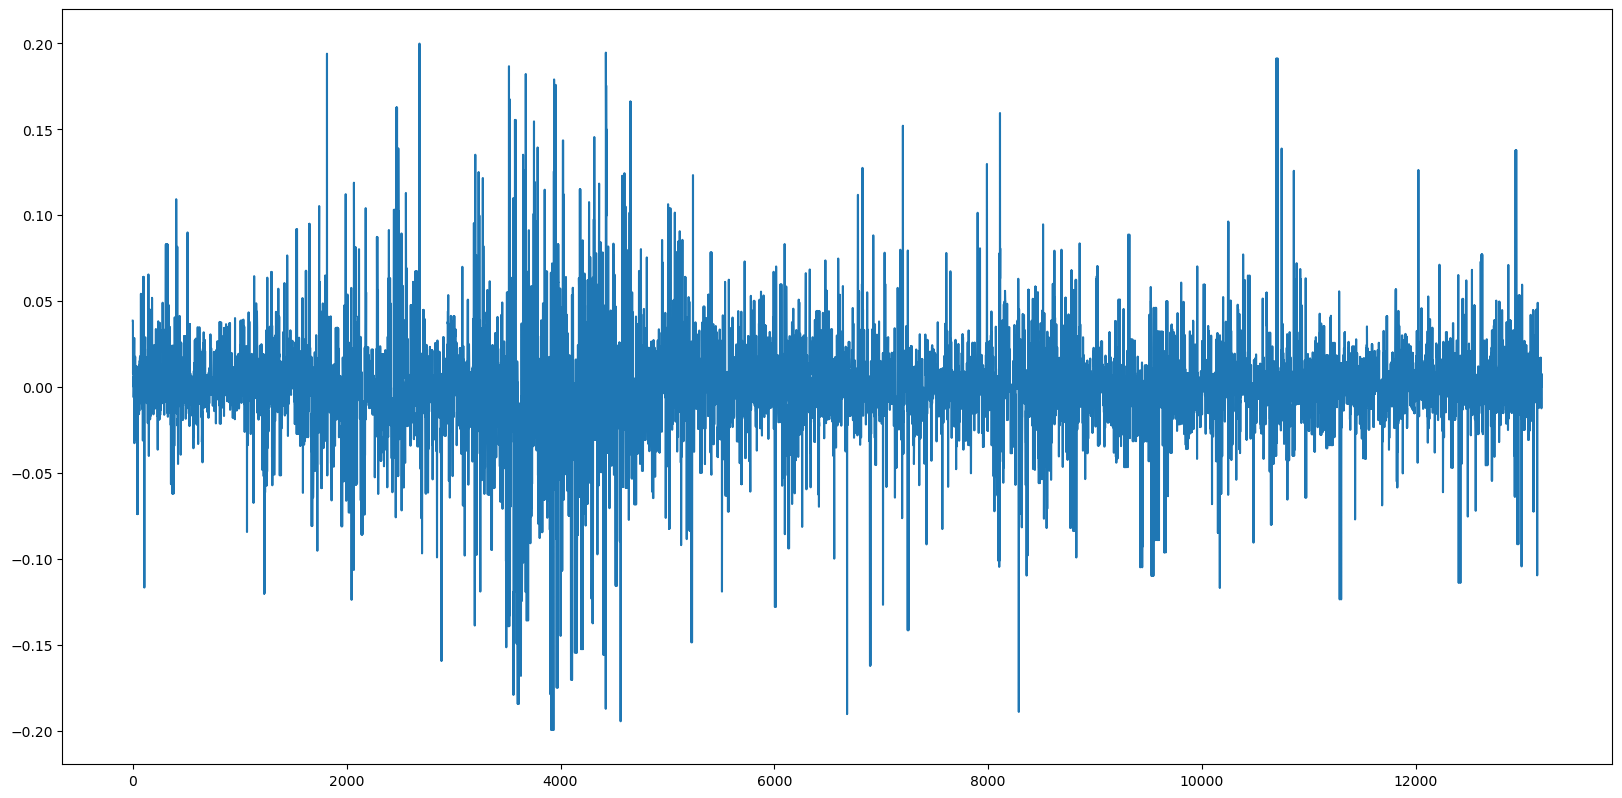

In [194]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=100) 
plt.plot(change)

In [33]:
with open("changes_previousday_test.txt", "wb") as fp:   #Pickling
      pickle.dump(changes, fp)

In [15]:
import pickle
with open("pad_company_report_thre_5_max_30_previousday.txt", "rb") as fp:   # Unpickling
     pad_company_report = pickle.load(fp)

In [22]:
pad_company_report[1]

[13,
 14,
 15,
 16,
 24,
 2,
 25,
 26,
 14,
 27,
 28,
 29,
 30,
 31,
 32,
 30,
 30,
 33,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072,
 16072]

In [10]:
import os
import string
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from keras.models import Sequential,load_model
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Add
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD, RMSprop
import pickle
from keras.utils import to_categorical
import tensorflow as tf
with open("pad_company_report_thre_5_max_30_previousday.txt", "rb") as fp:   # Unpickling
     pad_company_report = pickle.load(fp)

with open("word_embedding_matrix_thres_5_previousday.txt", "rb") as f:   # Unpickling
     word_embedding_matrix = pickle.load(f)

with open("change_previousday.txt", "rb") as f:   # Unpickling
     change = pickle.load(f)

change=change
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

for i in range(len(pad_company_report)):
    print('Processing '+str(i),end='\r')
    k=len(pad_company_report)-i-1
    for j in range(k):
        test1=[]
        test2=[]
        for n in range(len(pad_company_report[k])):
            if pad_company_report[k][n]!=16072:
                test1.append(pad_company_report[k][n])
        for n in range(len(pad_company_report[j])):
            if pad_company_report[j][n]!=16072:
                test2.append(pad_company_report[j][n])    
        
        if jaccard_similarity(test1,test2)>0.9:
            pad_company_report.pop(k)
            change.pop(k)
            break
            
print(len(pad_company_report))
changes=((change-np.mean(change))/np.std(change))
nb_words = len(word_embedding_matrix)
x_train, x_test, y_train, y_test = train_test_split(pad_company_report, changes, test_size = 0.1, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


12444ssing 13178


In [34]:
from keras.layers.recurrent import LSTM, GRU
from keras.models import Model

x_train, x_test, y_train, y_test = train_test_split(pad_company_report, changes, test_size = 0.1, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
max_length=30
filter_length1 = 3
filter_length2 = 5
weights = initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=2)
nb_filter = 128
rnn_output_size = 128
hidden_dims = 256
dropout=0.2
learning_rate = 0.0001
embedding_dim=300


def build_model():
    
    model1 = Sequential()
    
    model1.add(Embedding(nb_words, 
                         embedding_dim,
                         weights=[word_embedding_matrix], 
                         input_length=max_length))
    
    model1.add(Convolution1D(filters = nb_filter, 
                             kernel_size = 3, 
                            activation = 'relu'))

    model1.add(MaxPooling1D(pool_length=2))

    model1.add(LSTM(rnn_output_size, 
                   dropout = dropout))
    model2 = Sequential()
    
    model2.add(Embedding(nb_words, 
                         embedding_dim,
                         weights=[word_embedding_matrix], 
                         input_length=max_length))
    model2.add(Dropout(dropout))
    
    
    model2.add(Convolution1D(filters = nb_filter, 
                             kernel_size = 5, 
                             activation = 'relu'))
    model2.add(MaxPooling1D(pool_length=2))
    model2.add(LSTM(rnn_output_size, 
                   #activation=None,
                   dropout = dropout))
    
    model3 = Sequential()
    
    model3.add(Embedding(nb_words, 
                         embedding_dim,
                         weights=[word_embedding_matrix], 
                         input_length=max_length))
    model3.add(Dropout(dropout))
    
    
    model3.add(Convolution1D(filters = nb_filter, 
                             kernel_size = 7, 
                             activation = 'relu'))
    model3.add(MaxPooling1D(pool_length=2))
    model3.add(LSTM(rnn_output_size, 
                   dropout = dropout))
    
    
    model = Add()([model1.output, model2.output, model3.output])
    model = Dense(128, activation='relu')(model)
    model = Dense(1)(model)

    new_model = Model([model1.input, model2.input, model3.input], model)
    new_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001))
    return new_model

a=np.std(change)
b=np.mean(change)
accuracy_=[]
class MyCustomCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs=None):
            
            predictions = model.predict([x_test,x_test,x_test], verbose = 0)
            num=0
            
            #y_test_=y_test*(max(change)-min(change))+min(change)
            #predictions=predictions*(max(change)-min(change))+min(change)
            for i in range(len(y_test)):
                if (y_test[i]*a+b)*(predictions[i]*a+b)>0:
                    num+=1
            print('Testing accuracy is: '+str(num/len(y_test)))
            accuracy_.append(num/len(y_test))


model = build_model()
history=model.fit([x_train, x_train,x_train], y_train, batch_size=64, epochs=100, validation_data=([x_test,x_test,x_test], y_test),callbacks=[MyCustomCallback()], verbose=1, shuffle=True)


c:\users\haoboyang2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
c:\users\haoboyang2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
c:\users\haoboyang2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


Train on 11199 samples, validate on 1245 samples
Epoch 1/100
11199/11199 [==============================] - 11s 999us/step - loss: 1.0325 - val_loss: 0.9241
Testing accuracy is: 0.4819277108433735
Epoch 2/100
11199/11199 [==============================] - 8s 732us/step - loss: 1.0146 - val_loss: 0.9235
Testing accuracy is: 0.485140562248996
Epoch 3/100
11199/11199 [==============================] - 8s 726us/step - loss: 1.0040 - val_loss: 0.9149
Testing accuracy is: 0.5301204819277109
Epoch 4/100
11199/11199 [==============================] - 8s 728us/step - loss: 0.9914 - val_loss: 0.9162
Testing accuracy is: 0.5365461847389559
Epoch 5/100
11199/11199 [==============================] - 8s 728us/step - loss: 0.9769 - val_loss: 0.8903
Testing accuracy is: 0.5373493975903615
Epoch 6/100
11199/11199 [==============================] - 8s 720us/step - loss: 0.9484 - val_loss: 0.8664
Testing accuracy is: 0.5542168674698795
Epoch 7/100
11199/11199 [==============================] - 8s 733us/s

InternalError: GPU sync failed

In [31]:
predictions = model.predict([x_test,x_test,x_test], verbose = True)

1245/1245 [==============================] - 1s 407us/step


In [27]:
max(accuracy_)#3,5,7

0.5799196787148594

In [17]:
max(accuracy_)#3,5

0.5646586345381526

In [19]:
max(accuracy_)#3,5,7,9

0.5710843373493976

In [21]:
max(accuracy_)#5,7,9

0.5742971887550201

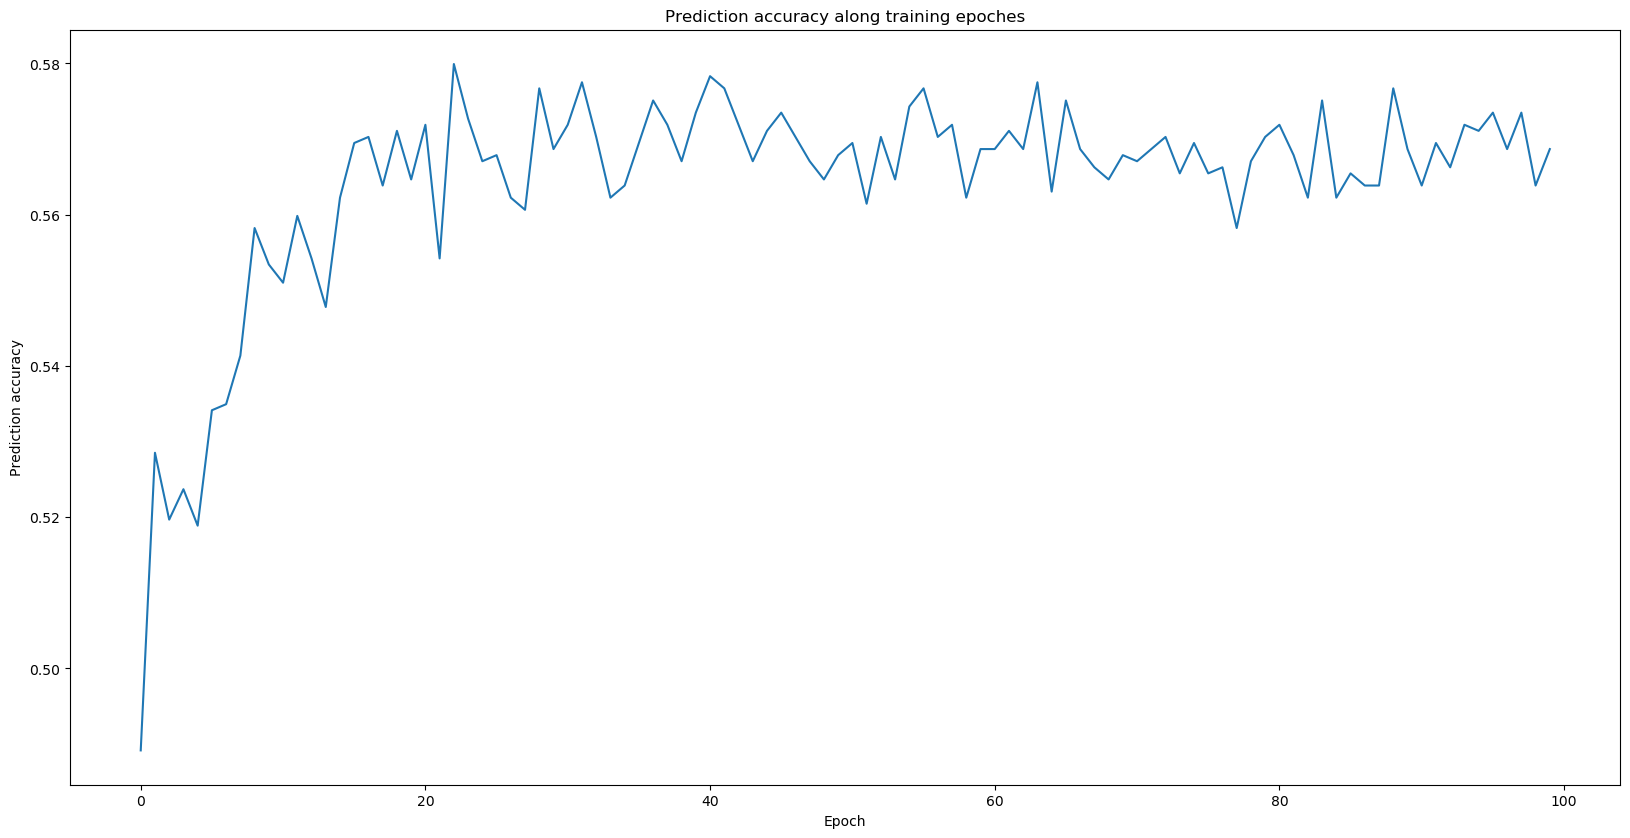

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
plt.title("Prediction accuracy along training epoches")
plt.xlabel("Epoch")
plt.ylabel("Prediction accuracy")
plt.plot(accuracy_)
plt.savefig('without_abs.2.png')

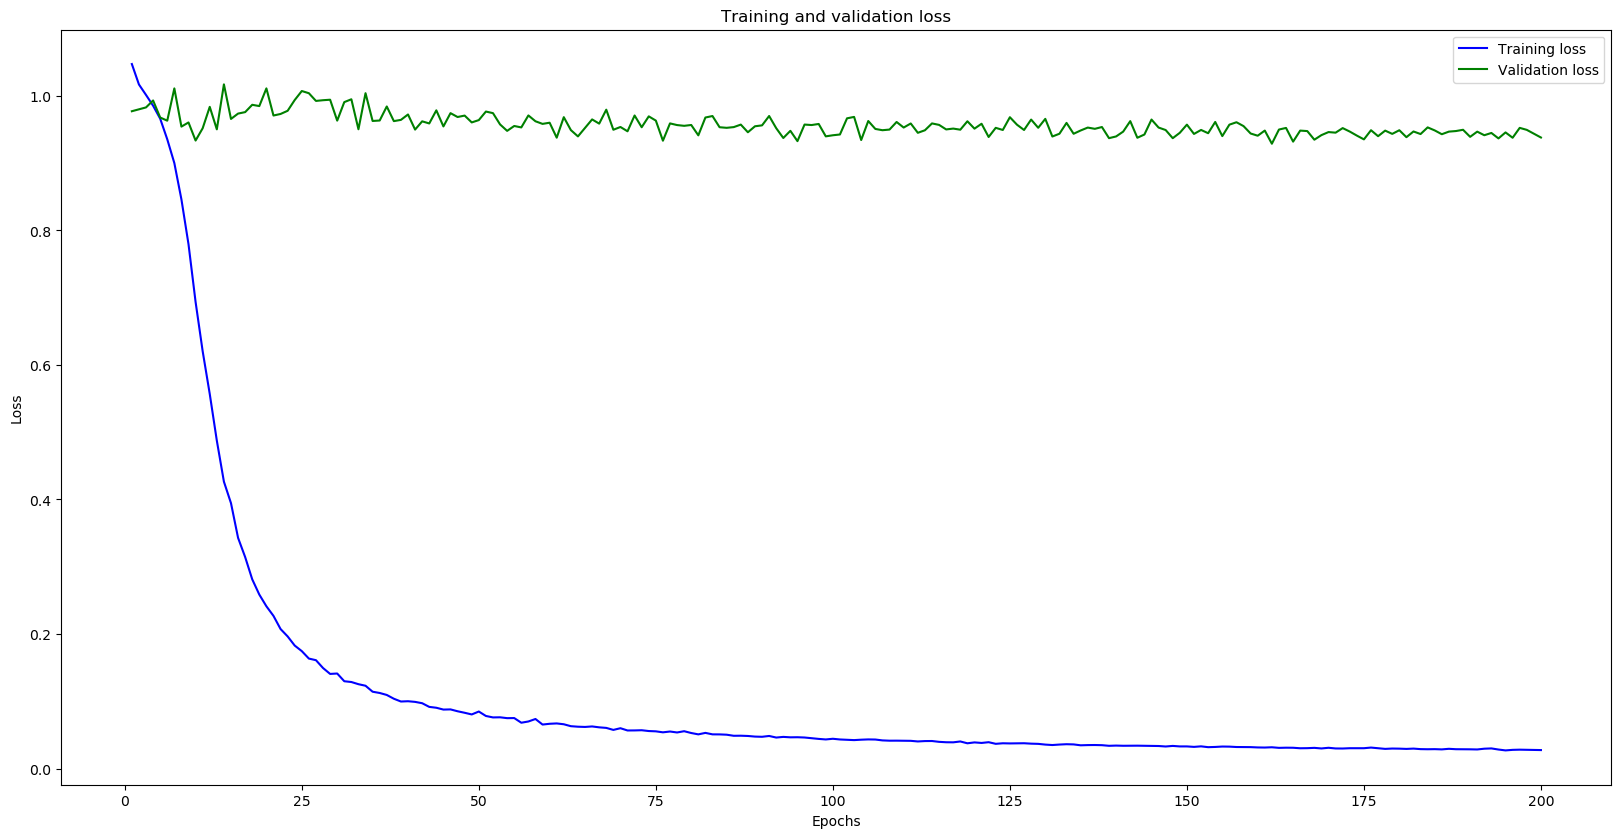

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epochs = range(1,len(loss) + 1)
figure(num=None, figsize=(20, 10), dpi=100)    
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('com_loss.png')
plt.legend()
plt.show()

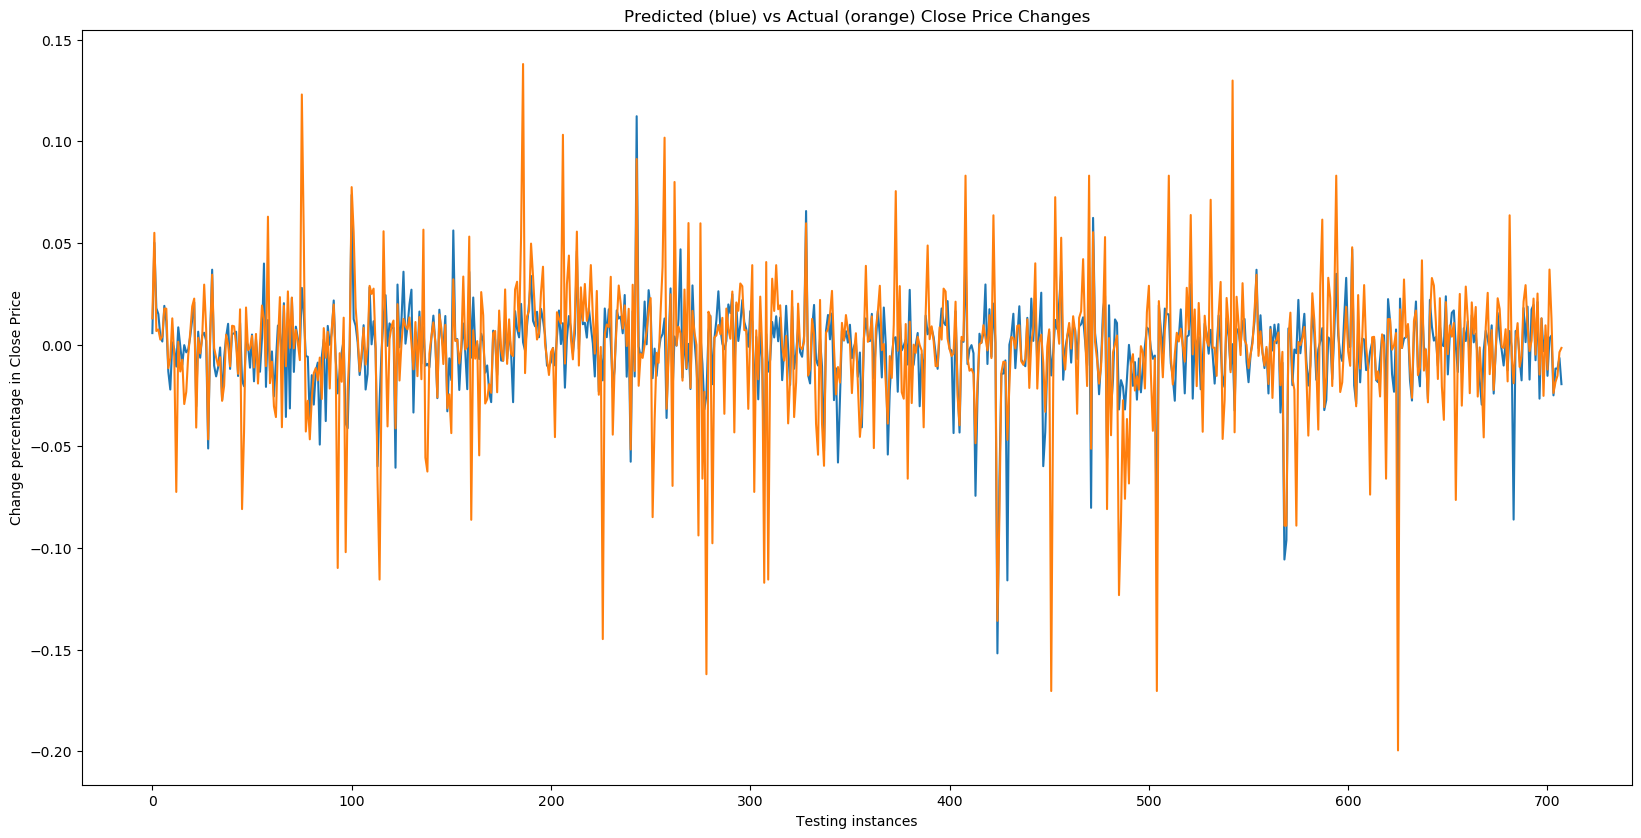

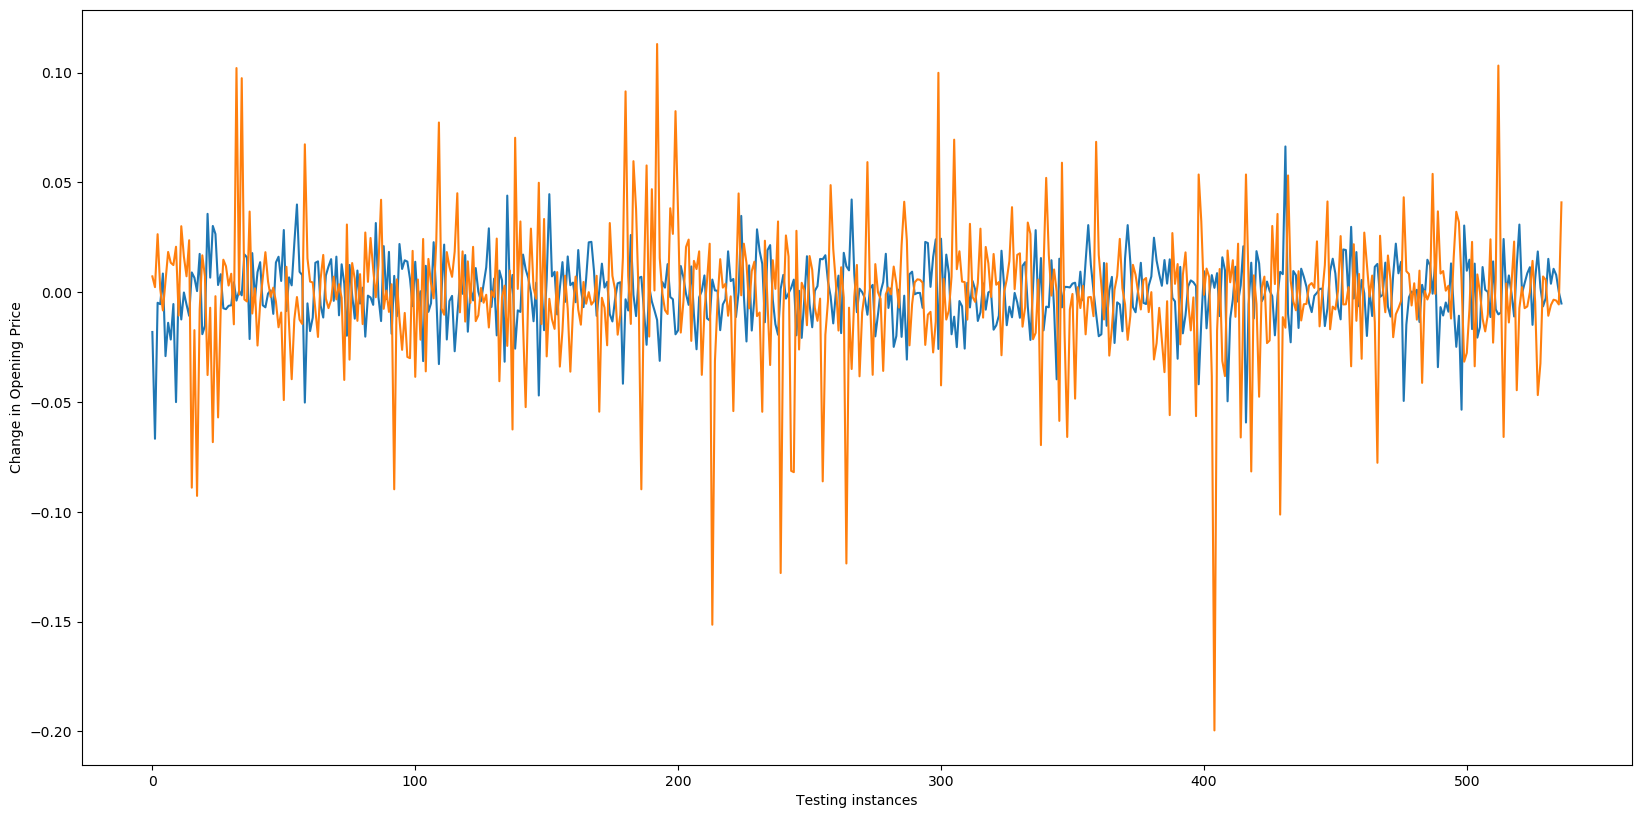

In [32]:

figure(num=None, figsize=(20, 10), dpi=100) 
right_prediction=[]
right_y=[]
false_prediction=[]
false_y=[]
for i in range(len(y_test)):
    if (y_test[i]*a+b)*(predictions[i]*a+b)>0:
        right_prediction.append(predictions[i]*np.std(change)+np.mean(change))
        right_y.append(y_test[i]*np.std(change)+np.mean(change))
    else:
        false_prediction.append(predictions[i]*np.std(change)+np.mean(change))
        false_y.append(y_test[i]*np.std(change)+np.mean(change))
plt.plot(right_prediction)
plt.plot(right_y)
   
plt.title("Predicted (blue) vs Actual (orange) Close Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change percentage in Close Price")
plt.show()

figure(num=None, figsize=(20, 10), dpi=100) 
plt.plot(false_prediction)
plt.plot(false_y)
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()

In [234]:
index=[]
for i in range(len(y_test)):
    if y_test[i]*predictions[i]>0:
        if y_test[i]*np.std(change)+np.mean(change)==-0.19957531633016204:
            print(x_test[i])

[  910  3786  3787   657  2740   405  2486  2904  1281   615  2757   384
  5733   148  1718   374  2757  1514   739    24 16072 16072 16072 16072
 16072 16072 16072 16072 16072 16072]


In [241]:
vocab_to_int['real']

3786

In [221]:
index=[]
for i in range(len(y_test)):
    if y_test[i]*predictions[i]>0:
        if abs(predictions[i]*np.std(change)+np.mean(change)-y_test[i]*np.std(change)+np.mean(change))>=0.02:
            index.append(i)
            print(i)
            print(y_test[i]*np.std(change)+np.mean(change))
            print(predictions[i]*np.std(change)+np.mean(change)-y_test[i]*np.std(change)+np.mean(change))

1
-0.05128210583742492
[0.03394761]
22
0.0193122943785279
[-0.02081193]
28
0.04930335834226523
[-0.04742853]
31
-0.08977551569952695
[0.06909083]
32
0.03198079605603854
[-0.02538856]
43
-0.037938885486224275
[0.03273667]
85
-0.04126834216062708
[0.03112274]
90
0.0001858390633710837
[0.02427169]
93
0.07546054513780959
[-0.0602763]
94
0.007644138184009594
[0.02897041]
96
0.024216194594594592
[-0.02724044]
104
0.02581559175679949
[-0.0220892]
105
0.0486655808477236
[-0.04086088]
110
0.1229872764135374
[-0.10871193]
113
-0.0761589709881136
[0.0619982]
116
0.11915380198614134
[-0.11799002]
124
-0.004422250393724948
[-0.03077405]
125
0.030760370849504146
[-0.02685297]
135
-0.004613648596693657
[-0.02058857]
139
-0.052578385930778994
[0.03930216]
142
-0.03324353878729422
[0.02250096]
144
0.05123362368259108
[-0.04901644]
162
0.08348585620915039
[-0.08492263]
166
-0.004188690604278106
[-0.03662291]
167
0.07717805070412975
[-0.07574349]
192
0.025780143564896232
[-0.02007456]
193
-0.014868009105

In [235]:
import pandas as pd
import numpy as np
import re


def clean_word(text, remove_stopwords = True):
    text = text.lower()
    # Format words and remove unwanted characters
    #word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles',
     #     'apple','amazon','google',
      #    'intel','mcdonald','microsoft','twitter','walmart']
    word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles']
    for i in word:
        text = re.sub(i, "", text)
    return text

def combine_companyname(text, remove_stopwords = True):

    text = re.sub('american airlines',"americanairlines", text)
    text = re.sub('american express',"americanexpress", text)
    text = re.sub('american tower',"americantower", text)
    text = re.sub('citi group',"citigroup", text)
    text = re.sub('coca cola',"cocacola", text)
    text = re.sub('morgan stanley',"morganstanley", text)
    text = re.sub('southwest airlines',"southwestairlines", text)
    text = re.sub('texas instruments',"texasinstruments", text)
    text = re.sub('wells fargo',"wellsfargo", text)
    text = re.sub('berkshire hathaway',"berkshirehathaway", text)
    text = re.sub('general motors',"generalmotors", text)
    text = re.sub('general electric',"generalelectric", text)
    text = re.sub('fannie mae',"fanniemae", text)
    text = re.sub('bank of america',"bankofamerica", text)
    text = re.sub('united technologies',"unitedtechnologies", text)
    return text

news=pd.read_csv("news_update.csv",keep_default_na=False)
sp500=pd.read_csv("sp500.csv")
sp500_all=pd.read_csv("sp500_all.csv")
report=[]
index=[]
for i in range(len(news)):
    report.append(combine_companyname(news['Headlines'][i]))
#company=['apple']
company=['apple','amazon','google','intel','mcdonald','microsoft','twitter','walmart',
     '3m','abbott','abbvie','abiomed','accenture','adobe','aes','amd','aflac',
     'akamai','albemarle','align','allegion','alphabet','altria','americanairlines',
     'americanexpress','americantower','ameriprise','amerisourcebergan','ametek','amgen','amphenol',
     'ansys','anthem','aosmith','apache','assurant','att','atmos','autodesk',
     'autozone','boigen','blackrock','boeing','borgwarner','chubb','cisco','citigroup','cme',
     'cms','cocacola','comerica','corning','cvs','darden','davita','deere','deltaair',
     'diamondback','dominion','ebay','ecolab','edison','edwards','facebook','fiserv',
     'hp','idex','idexx','illumina','ibm','jpmorgan','lilly','mckesson','moody',
     'morganstanley','netflix','nike','ross','southwestairlines','texasinstruments',
     'visa','wellsfargo','welltower','xerox','xilinx','zebra','zoetis','exxon',
     'unitedhealth','chevron','generalmotors','costco','cardinal','verizon','kroger','generalelectric','fanniemae',
      'bankofamerica','dupont','johnson','unitedtechnologies','metlife','fedex','pepsico','goldman']

code={'apple':'AAPL','amazon':'AMZN','google':'GOOGL','intel':'INTC','mcdonald':'MCD','microsoft':'MSFT','twitter':'TWTR','walmart':'WMT',
     '3m':'MMM','abbott':'ABT','abbvie':'ABBV','abiomed':'ABMD','accenture':'ACN','adobe':'ADBE','aes':'AES','amd':'AMD','aflac':'AFL',
     'akamai':'AKAM','albemarle':'ALB','align':'ALGN','allegion':'ALLE','alphabet':'GOOGL','altria':'MO','americanairlines':'AAL',
     'americanexpress':'AXP','americantower':'AMT','ameriprise':'AMP','amerisourcebergan':'ABC','ametek':'AME','amgen':'AMGN','amphenol':'APH',
     'ansys':'ANSS','anthem':'ANTM','aosmith':'AOS','apache':'APA','arista':'ANET','assurant':'AIZ','att':'T','atmos':'ATO','autodesk':'ADSK',
     'autozone':'AZO','boigen':'BIIB','blackrock':'BLK','boeing':'BA','borgwarner':'BXP','chubb':'CB','cisco':'CSCO','citigroup':'C','cme':'CME',
     'cms':'CMS','cocacola':'KO','comerica':'CMA','corning':'GLW','cvs':'CVS','darden':'DRI','davita':'DVA','deere':'DE','deltaair':'DAL',
     'diamondback':'FANG','dominion':'D','dow':'DOW','ebay':'EBAY','ecolab':'ECL','edison':'EIX','edwards':'EW','facebook':'FB','fiserv':'FISV',
     'fox':'FOX','hp':'HP','idex':'IEX','idexx':'IDXX','illumina':'ILMN','ibm':'IBM','jpmorgan':'JPM','lilly':'LLY','mckesson':'MCK','moody':'MCO',
     'morganstanley':'MS','netflix':'NFLX','nike':'NKE','paypal':'PYPL','ross':'ROST','southwestairlines':'LUV','texasinstruments':'TXN',
     'visa':'V','wellsfargo':'WFC','welltower':'WELL','xerox':'XRX','xilinx':'XLNX','zebra':'ZBRA','zoetis':'ZTS','exxon':'XOM',
     'unitedhealth':'UNH','chevron':'CVX','generalmotors':'GM','costco':'COST','cardinal':'CAH','verizon':'VZ','kroger':'KR',
      'generalelectric':'GE','fanniemae':'FNMA','dupont':'DD','goldman':'GS',
      'bankofamerica':'BAC','dell':'DELL','johnson':'JNJ','unitedtechnologies':'RTX','metlife':'MET','fedex':'FDX','pepsico':'PEP'}

for i in range(len(report)):
    print(str(i)+'/'+str(len(report))+'         There is '+str(len(change))+' data',end="\r")
    for data in company:
        if data in news['Headlines'][i].split():
            date_=str(news['Day'][i])+'-'+str(news['Month'][i])+'-'+str(news['Year'][i])[2:4]
            if date_!='20-Nov-13' and date_!='20-Oct-06':
                code_=code[data]+'.Close'
                for k in range(1,len(sp500)):
                    if date_==sp500['Date'][k]:
                        change_=(sp500_all[code_][k-1]-sp500_all[code_][k-2])/sp500_all[code_][k-2]
                        if np.isnan(change_)==False and len(report[i].split())!=0:
                            if abs(change_+0.19957531633016204)<0.00000001:
                                print(date_)
                                print(report[i])
                                break
                        break
            break

594/106493         There is 13179 data

21-Nov-08493         There is 13179 data
citigroup shares t half
21-Nov-08493         There is 13179 data
citigroup inc planning selling stake turkish lender akbank source familiar situation said friday
21-Nov-08493         There is 13179 data
goldman sachs group inc gsn interested buying hardhit citigroup inc cn even substantial government financial support person familiar goldman strategy said friday
21-Nov-08493         There is 13179 data
citigroup inc chief executive vikram pandit tried downplay speculation banking giant might sell major binesses restore health investor confidence shares still tumbled fifth straight day
21-Nov-08493         There is 13179 data
 mets citigroup inc said friday naming rights deal struggling banking giant baseball team new ballpark remains place
21-Nov-08493         There is 13179 data
citigroup inc share price sinks investors wondering government help bank open question four investors spoke proposed scenarios
21-Nov-08493         There is 13179 data


In [202]:
num=0
for i in range(len(y_test)):
    if y_test[i]>=0:
        num+=1
print(1-num/len(y_test))

0.4772382397572079


In [26]:
import operator
dict(sorted(word_counts.items(), key=operator.itemgetter(1),reverse=True))

{'inc': 3284,
 'said': 1600,
 'apple': 1549,
 'corp': 1470,
 'google': 1115,
 'microsoft': 1109,
 'company': 925,
 'stores': 896,
 'walmart': 814,
 'percent': 780,
 'sales': 607,
 'thursday': 587,
 'new': 577,
 'shares': 562,
 'chief': 541,
 'tuesday': 526,
 'executive': 510,
 'wednesday': 495,
 'market': 492,
 'friday': 461,
 'billion': 461,
 'iphone': 460,
 'yahoo': 458,
 'wmtn': 452,
 'world': 450,
 'monday': 438,
 'year': 391,
 'would': 380,
 'search': 363,
 'software': 356,
 'quarterly': 334,
 'intel': 324,
 'biness': 317,
 'internet': 315,
 'largest': 311,
 'maker': 308,
 'investors': 307,
 'msfto': 300,
 'reported': 292,
 'retailer': 283,
 'profit': 282,
 'technology': 282,
 'million': 270,
 'mobile': 260,
 'deal': 259,
 'web': 258,
 'could': 242,
 'steve': 240,
 'aaplo': 240,
 'mcdonald': 235,
 'first': 227,
 'jobs': 227,
 'two': 223,
 'china': 222,
 'companies': 219,
 'results': 217,
 'week': 214,
 'may': 214,
 'co': 213,
 'stock': 212,
 'plans': 209,
 'revenue': 207,
 'years'

In [ ]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import os
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Add
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import pickle

x_train, x_test, y_train, y_test = train_test_split(company_headlines, changes, test_size = 0.15, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
X_train_input = tfidf.transform(x_train)
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

DROPOUT_RATE = 0.2
UNITS = 64
NUM_CLASSES = 2
LAYERS = 2

input_shape = X_train_input.shape[1:]
model = Sequential()
model.add(Dropout(rate=DROPOUT_RATE, input_shape=input_shape))
model.add(Dense(units=UNITS, activation='relu'))
model.add(Dropout(rate=0.2))
    
model.add(Dense(units=1, activation='sigmoid'))
LEARNING_RATE = 1e-3
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy')
EPOCHS = 30
BATCH_SIZE = 128
model.save("simple_model.h5")
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(tfidf.transform(x_test), y_test), verbose=1, batch_size=BATCH_SIZE)


In [2]:
import os
import string
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Add
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


In [5]:
len(change)-len(company_report)

0

In [30]:
sp500_all

Unnamed: 0   MMM.Close  ABT.Close  ABBV.Close  ABMD.Close  ACN.Close  \
0              1   78.470001  23.404644         NaN   13.940000  31.500000   
1              2   80.089996  23.428635         NaN   14.060000  32.070000   
2              3   79.889999  23.087976         NaN   14.100000  32.380001   
3              4   79.459999  23.164743         NaN   13.940000  32.389999   
4              5   79.239998  22.977621         NaN   14.500000  32.810001   
...          ...         ...        ...         ...         ...        ...   
1779        1780  129.789993  37.759998   48.040001   27.290001  77.059998   
1780        1781  129.850006  38.049999   48.439999   27.570000  78.019997   
1781        1782  130.130005  37.939999   48.869999   26.990000  78.519997   
1782        1783  130.050003  38.709999   48.459999   27.260000  78.470001   
1783        1784  129.179993  38.180000   47.950001   27.270000  78.160004   

      ATVI.Close  ADBE.Close  AMD.Close  AAP.Close  ...  WLTW.Close  \
0       7.630000   38.200001  20.120001  35.459999  ...   99.470200   
1       7.635000   38.580002  20.240000  36.250000  ...  100.105957   
2       7.415000   38.090000  20.320000  36.360001  ...  100.000000   
3       7.135000   38.939999  20.830000  35.189999  ...  100.688744   
4       7.810000   39.360001  21.500000  36.400002  ...  100.052979   
...          ...         ...        ...        ...  ...         ...   
1779   17.700001   57.169998   3.520000  98.879997  ...  119.973511   
1780   17.719999   57.349998   3.500000  99.339996  ...  119.867546   
1781   17.520000   56.599998   3.470000  98.309998  ...  118.490067   
1782   16.889999   55.770000   3.420000  97.059998  ...  117.218544   
1783   17.200001   55.939999   3.420000  97.669998  ...  118.384109   

      WYNN.Close  XEL.Close  XRX.Close  XLNX.Close  XYL.Close  YUM.Close  \
0      72.800003  21.850000  42.160736   25.360001        NaN  20.866283   
1      72.830002  21.930000  43.399208   25.400000        NaN  21.649893   
2      72.470001  21.760000  44.295124   25.139999        NaN  21.815241   
3      73.309998  21.950001  44.505928   25.490000        NaN  21.563623   
4      73.500000  21.969999  44.453228   25.740000        NaN  21.667866   
...          ...        ...        ...         ...        ...        ...   
1779  168.509995  28.590000  29.064558   42.990002  34.380001  52.724659   
1780  166.389999  28.600000  29.090910   43.660000  34.470001  53.184761   
1781  163.589996  28.620001  29.222662   43.770000  33.939999  52.774982   
1782  159.199997  28.490000  29.565218   43.090000  34.150002  53.040977   
1783  158.389999  28.100000  28.932806   43.209999  34.299999  51.991375   

      ZBH.Close  ZION.Close  ZTS.Close  
0     70.589996   81.040001        NaN  
1     71.760002   81.339996        NaN  
2     71.919998   81.080002        NaN  
3     71.089996   80.570000        NaN  
4     72.129997   80.809998        NaN  
...         ...         ...        ...  
1779  90.300003   29.120001  31.680000  
1780  90.589996   29.200001  31.809999  
1781  89.589996   28.870001  31.620001  
1782  89.940002   28.209999  31.420000  
1783  89.269997   28.270000  31.370001  

[1784 rows x 478 columns]

In [6]:
changes=change
change=(change-np.mean(change))/np.std(change)

In [7]:
max(change)

9.334891742985429

In [18]:
min(change)

-0.12656835025053975

In [27]:
import sys

class PorterStemmer:

    def __init__(self):
        """The main part of the stemming algorithm starts here.
        b is a buffer holding a word to be stemmed. The letters are in b[k0],
        b[k0+1] ... ending at b[k]. In fact k0 = 0 in this demo program. k is
        readjusted downwards as the stemming progresses. Zero termination is
        not in fact used in the algorithm.

        Note that only lower case sequences are stemmed. Forcing to lower case
        should be done before stem(...) is called.
        """

        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string

    def cons(self, i):
        """cons(i) is TRUE <=> b[i] is a consonant."""
        if self.b[i] == 'a' or self.b[i] == 'e' or self.b[i] == 'i' or self.b[i] == 'o' or self.b[i] == 'u':
            return 0
        if self.b[i] == 'y':
            if i == self.k0:
                return 1
            else:
                return (not self.cons(i - 1))
        return 1

    def m(self):
        """m() measures the number of consonant sequences between k0 and j.
        if c is a consonant sequence and v a vowel sequence, and <..>
        indicates arbitrary presence,

           <c><v>       gives 0
           <c>vc<v>     gives 1
           <c>vcvc<v>   gives 2
           <c>vcvcvc<v> gives 3
           ....
        """
        n = 0
        i = self.k0
        while 1:
            if i > self.j:
                return n
            if not self.cons(i):
                break
            i = i + 1
        i = i + 1
        while 1:
            while 1:
                if i > self.j:
                    return n
                if self.cons(i):
                    break
                i = i + 1
            i = i + 1
            n = n + 1
            while 1:
                if i > self.j:
                    return n
                if not self.cons(i):
                    break
                i = i + 1
            i = i + 1

    def vowelinstem(self):
        """vowelinstem() is TRUE <=> k0,...j contains a vowel"""
        for i in range(self.k0, self.j + 1):
            if not self.cons(i):
                return 1
        return 0

    def doublec(self, j):
        """doublec(j) is TRUE <=> j,(j-1) contain a double consonant."""
        if j < (self.k0 + 1):
            return 0
        if (self.b[j] != self.b[j-1]):
            return 0
        return self.cons(j)

    def cvc(self, i):
        """cvc(i) is TRUE <=> i-2,i-1,i has the form consonant - vowel - consonant
        and also if the second c is not w,x or y. this is used when trying to
        restore an e at the end of a short  e.g.

           cav(e), lov(e), hop(e), crim(e), but
           snow, box, tray.
        """
        if i < (self.k0 + 2) or not self.cons(i) or self.cons(i-1) or not self.cons(i-2):
            return 0
        ch = self.b[i]
        if ch == 'w' or ch == 'x' or ch == 'y':
            return 0
        return 1

    def ends(self, s):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""
        length = len(s)
        if s[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length > (self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != s:
            return 0
        self.j = self.k - length
        return 1

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
        self.k = self.j + length

    def r(self, s):
        """r(s) is used further down."""
        if self.m() > 0:
            self.setto(s)

    def step1ab(self):
        """step1ab() gets rid of plurals and -ed or -ing. e.g.

           caresses  ->  caress
           ponies    ->  poni
           ties      ->  ti
           caress    ->  caress
           cats      ->  cat

           feed      ->  feed
           agreed    ->  agree
           disabled  ->  disable

           matting   ->  mat
           mating    ->  mate
           meeting   ->  meet
           milling   ->  mill
           messing   ->  mess

           meetings  ->  meet
        """
        if self.b[self.k] == 's':
            if self.ends("sses"):
                self.k = self.k - 2
            elif self.ends("ies"):
                self.setto("i")
            elif self.b[self.k - 1] != 's':
                self.k = self.k - 1
        if self.ends("eed"):
            if self.m() > 0:
                self.k = self.k - 1
        elif (self.ends("ed") or self.ends("ing")) and self.vowelinstem():
            self.k = self.j
            if self.ends("at"):   self.setto("ate")
            elif self.ends("bl"): self.setto("ble")
            elif self.ends("iz"): self.setto("ize")
            elif self.doublec(self.k):
                self.k = self.k - 1
                ch = self.b[self.k]
                if ch == 'l' or ch == 's' or ch == 'z':
                    self.k = self.k + 1
            elif (self.m() == 1 and self.cvc(self.k)):
                self.setto("e")

    def step1c(self):
        """step1c() turns terminal y to i when there is another vowel in the stem."""
        if (self.ends("y") and self.vowelinstem()):
            self.b = self.b[:self.k] + 'i' + self.b[self.k+1:]

    def step2(self):
        """step2() maps double suffices to single ones.
        so -ization ( = -ize plus -ation) maps to -ize etc. note that the
        string before the suffix must give m() > 0.
        """
        if self.b[self.k - 1] == 'a':
            if self.ends("ational"):   self.r("ate")
            elif self.ends("tional"):  self.r("tion")
        elif self.b[self.k - 1] == 'c':
            if self.ends("enci"):      self.r("ence")
            elif self.ends("anci"):    self.r("ance")
        elif self.b[self.k - 1] == 'e':
            if self.ends("izer"):      self.r("ize")
        elif self.b[self.k - 1] == 'l':
            if self.ends("bli"):       self.r("ble") # --DEPARTURE--
            # To match the published algorithm, replace this phrase with
            #   if self.ends("abli"):      self.r("able")
            elif self.ends("alli"):    self.r("al")
            elif self.ends("entli"):   self.r("ent")
            elif self.ends("eli"):     self.r("e")
            elif self.ends("ousli"):   self.r("ous")
        elif self.b[self.k - 1] == 'o':
            if self.ends("ization"):   self.r("ize")
            elif self.ends("ation"):   self.r("ate")
            elif self.ends("ator"):    self.r("ate")
        elif self.b[self.k - 1] == 's':
            if self.ends("alism"):     self.r("al")
            elif self.ends("iveness"): self.r("ive")
            elif self.ends("fulness"): self.r("ful")
            elif self.ends("ousness"): self.r("ous")
        elif self.b[self.k - 1] == 't':
            if self.ends("aliti"):     self.r("al")
            elif self.ends("iviti"):   self.r("ive")
            elif self.ends("biliti"):  self.r("ble")
        elif self.b[self.k - 1] == 'g': # --DEPARTURE--
            if self.ends("logi"):      self.r("log")
        # To match the published algorithm, delete this phrase

    def step3(self):
        """step3() dels with -ic-, -full, -ness etc. similar strategy to step2."""
        if self.b[self.k] == 'e':
            if self.ends("icate"):     self.r("ic")
            elif self.ends("ative"):   self.r("")
            elif self.ends("alize"):   self.r("al")
        elif self.b[self.k] == 'i':
            if self.ends("iciti"):     self.r("ic")
        elif self.b[self.k] == 'l':
            if self.ends("ical"):      self.r("ic")
            elif self.ends("ful"):     self.r("")
        elif self.b[self.k] == 's':
            if self.ends("ness"):      self.r("")

    def step4(self):
        """step4() takes off -ant, -ence etc., in context <c>vcvc<v>."""
        if self.b[self.k - 1] == 'a':
            if self.ends("al"): pass
            else: return
        elif self.b[self.k - 1] == 'c':
            if self.ends("ance"): pass
            elif self.ends("ence"): pass
            else: return
        elif self.b[self.k - 1] == 'e':
            if self.ends("er"): pass
            else: return
        elif self.b[self.k - 1] == 'i':
            if self.ends("ic"): pass
            else: return
        elif self.b[self.k - 1] == 'l':
            if self.ends("able"): pass
            elif self.ends("ible"): pass
            else: return
        elif self.b[self.k - 1] == 'n':
            if self.ends("ant"): pass
            elif self.ends("ement"): pass
            elif self.ends("ment"): pass
            elif self.ends("ent"): pass
            else: return
        elif self.b[self.k - 1] == 'o':
            if self.ends("ion") and (self.b[self.j] == 's' or self.b[self.j] == 't'): pass
            elif self.ends("ou"): pass
            # takes care of -ous
            else: return
        elif self.b[self.k - 1] == 's':
            if self.ends("ism"): pass
            else: return
        elif self.b[self.k - 1] == 't':
            if self.ends("ate"): pass
            elif self.ends("iti"): pass
            else: return
        elif self.b[self.k - 1] == 'u':
            if self.ends("ous"): pass
            else: return
        elif self.b[self.k - 1] == 'v':
            if self.ends("ive"): pass
            else: return
        elif self.b[self.k - 1] == 'z':
            if self.ends("ize"): pass
            else: return
        else:
            return
        if self.m() > 1:
            self.k = self.j

    def step5(self):
        """step5() removes a final -e if m() > 1, and changes -ll to -l if
        m() > 1.
        """
        self.j = self.k
        if self.b[self.k] == 'e':
            a = self.m()
            if a > 1 or (a == 1 and not self.cvc(self.k-1)):
                self.k = self.k - 1
        if self.b[self.k] == 'l' and self.doublec(self.k) and self.m() > 1:
            self.k = self.k -1

    def stem(self, p, i, j):
        """In stem(p,i,j), p is a char pointer, and the string to be stemmed
        is from p[i] to p[j] inclusive. Typically i is zero and j is the
        offset to the last character of a string, (p[j+1] == '\0'). The
        stemmer adjusts the characters p[i] ... p[j] and returns the new
        end-point of the string, k. Stemming never increases word length, so
        i <= k <= j. To turn the stemmer into a module, declare 'stem' as
        extern, and delete the remainder of this file.
        """
        # copy the parameters into statics
        self.b = p
        self.k = j
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b # --DEPARTURE--

        # With this line, strings of length 1 or 2 don't go through the
        # stemming process, although no mention is made of this in the
        # published algorithm. Remove the line to match the published
        # algorithm.

        self.step1ab()
        self.step1c()
        self.step2()
        self.step3()
        self.step4()
        self.step5()
        return self.b[self.k0:self.k+1]



In [111]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haoboyang2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [252]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result


In [ ]:
news=pd.read_csv("news_update.csv",keep_default_na=False)

In [307]:
index

['stocks rallied monday dow indtrials closing another record high buoyed optimism spending outlook walmart stores inc wmtn belief falling gasoline prices help boost consumer spending',
 'chicago walmart stores inc wmtn said monday october sales stores open least year percent far forecast percent percent growth',
 'att inc tn monday posted betterthanexpected rise thirdquarter profit helped strong growth wireless venture cingular mergerrelated cost savings',
 'detroit shares ford motor co fn posted biggest gain two months tuesday goldman sachs removed sell rating struggling automaker saying potential payoff restructuring would outweigh weak outlook',
 'hoton dupont co ddn chemicals maker tuesday posted betterthanexpected quarterly profit yearearlier loss helped rising sales higher prices especially paints biness',
 'chicagohong kong walmart stores inc wmtn teaming chinese bank shenzhen development bank sz launch credit card china tapping country trillion domestic savings',
 'pepsico inc 

In [265]:
company_headlines=company_headlines[:13297]

In [310]:

processed=[]
for i in range(len(company_headlines)):
    processed.append(index[i].split())

In [311]:
dictionary = gensim.corpora.Dictionary(processed)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [312]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [313]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [315]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"inc" + 0.005*"said" + 0.004*"billion" + 0.004*"bank" + 0.004*"corp" + 0.004*"credit" + 0.004*"co" + 0.004*"jpmorgan" + 0.004*"citigroup" + 0.004*"percent"
Topic: 1 Word: 0.005*"apple" + 0.005*"inc" + 0.005*"johnson" + 0.005*"said" + 0.005*"stores" + 0.004*"wednesday" + 0.004*"san" + 0.004*"walmart" + 0.004*"tuesday" + 0.004*"executive"
Topic: 2 Word: 0.006*"corp" + 0.005*"inc" + 0.005*"billion" + 0.005*"said" + 0.005*"company" + 0.005*"microsoft" + 0.004*"chief" + 0.004*"executive" + 0.004*"co" + 0.004*"jpmorgan"
Topic: 3 Word: 0.005*"group" + 0.005*"inc" + 0.005*"goldman" + 0.005*"said" + 0.005*"sachs" + 0.004*"co" + 0.004*"bank" + 0.004*"company" + 0.004*"billion" + 0.003*"million"
Topic: 4 Word: 0.007*"bank" + 0.006*"jpmorgan" + 0.006*"goldman" + 0.006*"chase" + 0.006*"sachs" + 0.005*"group" + 0.005*"co" + 0.005*"jpmn" + 0.005*"said" + 0.005*"inc"
Topic: 5 Word: 0.006*"corp" + 0.005*"inc" + 0.004*"company" + 0.004*"said" + 0.004*"percent" + 0.004*"bank" + 0.004

In [153]:
for index, score in lda_model_tfidf[bow_corpus[3]]:
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.22397807240486145	 
Topic: 0.014*"adob" + 0.006*"walmart" + 0.005*"mayer" + 0.005*"loeb" + 0.005*"creativ" + 0.004*"fedex" + 0.004*"jackson" + 0.004*"bank" + 0.004*"yahoo" + 0.004*"up"

Score: 0.6868908405303955	 
Topic: 0.007*"bank" + 0.007*"goldman" + 0.006*"sec" + 0.005*"jpmorgan" + 0.004*"settlement" + 0.004*"investig" + 0.004*"case" + 0.004*"court" + 0.004*"secur" + 0.003*"lawsuit"


In [167]:
lda_model_tfidf[bow_corpus[4]][0][1]

0.42410597

In [178]:
score=[]
for i in range(len(change)):
    score_each=[]
    for l in range(10):
        score_each.append(0)
    scores=lda_model_tfidf[bow_corpus[i]]
    for k in range(len(scores)):
        score_each[scores[k][0]]=scores[k][1]
    score.append(score_each)

In [179]:
import os
import string
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Add
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf


x_train, x_test, y_train, y_test = train_test_split(score, changes, test_size = 0.1, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Dense(32, input_dim=10))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')

accuracy_=[]
class MyCustomCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs=None):
            
            predictions = model.predict(x_test, verbose = 0)
            num=0
            
            #y_test_=y_test*(max(change)-min(change))+min(change)
            #predictions=predictions*(max(change)-min(change))+min(change)
            for i in range(len(y_test)):
                if y_test[i]*predictions[i]>0:
                    num+=1
            print('Testing accuracy is: '+str(num/len(y_test)))
            accuracy_.append(num/len(y_test))
            
            
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=1, batch_size=64,callbacks=[MyCustomCallback()])

Train on 11835 samples, validate on 1315 samples
Epoch 1/200
11835/11835 [==============================] - 1s 83us/step - loss: 1.0253 - val_loss: 1.0421
Testing accuracy is: 0.5163498098859316
Epoch 2/200
11835/11835 [==============================] - 0s 34us/step - loss: 1.0116 - val_loss: 1.0365
Testing accuracy is: 0.5079847908745247
Epoch 3/200
11835/11835 [==============================] - 0s 32us/step - loss: 1.0051 - val_loss: 1.0339
Testing accuracy is: 0.5064638783269962
Epoch 4/200
11835/11835 [==============================] - 0s 32us/step - loss: 1.0015 - val_loss: 1.0319
Testing accuracy is: 0.5041825095057034
Epoch 5/200
11835/11835 [==============================] - 0s 32us/step - loss: 0.9992 - val_loss: 1.0311
Testing accuracy is: 0.5041825095057034
Epoch 6/200
11835/11835 [==============================] - 0s 32us/step - loss: 0.9979 - val_loss: 1.0308
Testing accuracy is: 0.49277566539923956
Epoch 7/200
11835/11835 [==============================] - 0s 32us/step - 

KeyboardInterrupt: 

In [137]:
import pandas as pd
import numpy as np
import re


def clean_word(text, remove_stopwords = True):
    text = text.lower()
    # Format words and remove unwanted characters
    #word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles',
     #     'apple','amazon','google',
      #    'intel','mcdonald','microsoft','twitter','walmart']
    word=['us','reuters','york','street','wall','san','francisco','francisconew','seattle','los','chicago','angeles']
    for i in word:
        text = re.sub(i, "", text)
    return text

def combine_companyname(text, remove_stopwords = True):

    text = re.sub('american airlines',"americanairlines", text)
    text = re.sub('american express',"americanexpress", text)
    text = re.sub('american tower',"americantower", text)
    text = re.sub('citi group',"citigroup", text)
    text = re.sub('coca cola',"cocacola", text)
    text = re.sub('morgan stanley',"morganstanley", text)
    text = re.sub('southwest airlines',"southwestairlines", text)
    text = re.sub('texas instruments',"texasinstruments", text)
    text = re.sub('wells fargo',"wellsfargo", text)
    text = re.sub('berkshire hathaway',"berkshirehathaway", text)
    text = re.sub('general motors',"generalmotors", text)
    text = re.sub('general electric',"generalelectric", text)
    text = re.sub('fannie mae',"fanniemae", text)
    text = re.sub('bank of america',"bankofamerica", text)
    text = re.sub('united technologies',"unitedtechnologies", text)
    return text

news=pd.read_csv("news_update.csv",keep_default_na=False)
sp500=pd.read_csv("sp500.csv")
sp500_all=pd.read_csv("sp500_all.csv")
report=[]
index=[]
for i in range(len(news)):
    report.append(combine_companyname(news['Report'][i]))
company_headlines=[]
change=[]
company_list={}
sp500_headlines=[]
#company=['apple']
company=['apple','amazon','google','intel','mcdonald','microsoft','twitter','walmart',
     '3m','abbott','abbvie','abiomed','accenture','adobe','aes','amd','aflac',
     'akamai','albemarle','align','allegion','alphabet','altria','americanairlines',
     'americanexpress','americantower','ameriprise','amerisourcebergan','ametek','amgen','amphenol',
     'ansys','anthem','aosmith','apache','assurant','att','atmos','autodesk',
     'autozone','boigen','blackrock','boeing','borgwarner','chubb','cisco','citigroup','cme',
     'cms','cocacola','comerica','corning','cvs','darden','davita','deere','deltaair',
     'diamondback','dominion','ebay','ecolab','edison','edwards','facebook','fiserv',
     'hp','idex','idexx','illumina','ibm','jpmorgan','lilly','mckesson','moody',
     'morganstanley','netflix','nike','ross','southwestairlines','texasinstruments',
     'visa','wellsfargo','welltower','xerox','xilinx','zebra','zoetis','exxon',
     'unitedhealth','chevron','generalmotors','costco','cardinal','verizon','kroger','generalelectric','fanniemae',
      'bankofamerica','dupont','johnson','unitedtechnologies','metlife','fedex','pepsico','goldman']

code={'apple':'AAPL','amazon':'AMZN','google':'GOOGL','intel':'INTC','mcdonald':'MCD','microsoft':'MSFT','twitter':'TWTR','walmart':'WMT',
     '3m':'MMM','abbott':'ABT','abbvie':'ABBV','abiomed':'ABMD','accenture':'ACN','adobe':'ADBE','aes':'AES','amd':'AMD','aflac':'AFL',
     'akamai':'AKAM','albemarle':'ALB','align':'ALGN','allegion':'ALLE','alphabet':'GOOGL','altria':'MO','americanairlines':'AAL',
     'americanexpress':'AXP','americantower':'AMT','ameriprise':'AMP','amerisourcebergan':'ABC','ametek':'AME','amgen':'AMGN','amphenol':'APH',
     'ansys':'ANSS','anthem':'ANTM','aosmith':'AOS','apache':'APA','arista':'ANET','assurant':'AIZ','att':'T','atmos':'ATO','autodesk':'ADSK',
     'autozone':'AZO','boigen':'BIIB','blackrock':'BLK','boeing':'BA','borgwarner':'BXP','chubb':'CB','cisco':'CSCO','citigroup':'C','cme':'CME',
     'cms':'CMS','cocacola':'KO','comerica':'CMA','corning':'GLW','cvs':'CVS','darden':'DRI','davita':'DVA','deere':'DE','deltaair':'DAL',
     'diamondback':'FANG','dominion':'D','dow':'DOW','ebay':'EBAY','ecolab':'ECL','edison':'EIX','edwards':'EW','facebook':'FB','fiserv':'FISV',
     'fox':'FOX','hp':'HP','idex':'IEX','idexx':'IDXX','illumina':'ILMN','ibm':'IBM','jpmorgan':'JPM','lilly':'LLY','mckesson':'MCK','moody':'MCO',
     'morganstanley':'MS','netflix':'NFLX','nike':'NKE','paypal':'PYPL','ross':'ROST','southwestairlines':'LUV','texasinstruments':'TXN',
     'visa':'V','wellsfargo':'WFC','welltower':'WELL','xerox':'XRX','xilinx':'XLNX','zebra':'ZBRA','zoetis':'ZTS','exxon':'XOM',
     'unitedhealth':'UNH','chevron':'CVX','generalmotors':'GM','costco':'COST','cardinal':'CAH','verizon':'VZ','kroger':'KR',
      'generalelectric':'GE','fanniemae':'FNMA','dupont':'DD','goldman':'GS',
      'bankofamerica':'BAC','dell':'DELL','johnson':'JNJ','unitedtechnologies':'RTX','metlife':'MET','fedex':'FDX','pepsico':'PEP'}

for i in range(len(report)):
    print(str(i)+'/'+str(len(report))+'         There is '+str(len(change))+' data',end="\r")
    for data in company:
        if data in news['Headlines'][i].split():
            date_=str(news['Day'][i])+'-'+str(news['Month'][i])+'-'+str(news['Year'][i])[2:4]
            if date_!='20-Nov-13':
                code_=code[data]+'.Close'
                for k in range(1,len(sp500)):
                    if date_==sp500['Date'][k]:
                        change_=(sp500_all[code_][k]-sp500_all[code_][k-1])/sp500_all[code_][k-1]
                        if np.isnan(change_)==False and len(report[i].split())!=0:
                            change.append(change_)
                            company_headlines.append(clean_word(report[i]))
                            if data in company_list:
                                company_list[data]+=1
                            else:
                                company_list[data]=1
                            index.append(i)
                        break
            break